In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division
import os
import time
import struct

import tensorflow as tf
from six.moves import range
import numpy as np
import zhusuan as zs
from keras.utils import to_categorical
import matplotlib.pyplot as plt


def load_image_set(filename):
    # load MNIST data
    with open(filename, 'rb') as binfile:
        buffers = binfile.read()
        head = struct.unpack_from('>IIII', buffers, 0)
        offset = struct.calcsize('>IIII')
        imgNum, width, height = head[1], head[2], head[3]
        bits = imgNum * width * height
        bitsString = '>' + str(bits) + 'B'
        imgs = struct.unpack_from(bitsString, buffers, offset)
    imgs = np.reshape(imgs, [imgNum, width, height])
    print('finish loadign data from ' + filename)
    return imgs


def load_label_set(filename):
    # load MNIST label
    with open(filename, 'rb') as binfile:
        buffers = binfile.read()
        head = struct.unpack_from('>II', buffers, 0)
        imgNum = head[1]
        offset = struct.calcsize('>II')
        numString = '>' + str(imgNum) + 'B'
        labels = struct.unpack_from(numString, buffers, offset)
    labels = np.reshape(labels, [imgNum, 1])
    print('finish loading label from ' + filename)
    return labels


@zs.reuse('model')
def cvae(observed, x_dim, y_dim, z_dim, n, n_particles=1):
    with zs.BayesianNet(observed=observed) as model:
        y = zs.Empirical('y', tf.int32, (n, y_dim))
        y = tf.to_float(y)
        z_mean = tf.zeros([n, z_dim])
        z = zs.Normal('z', z_mean, std=1., group_ndims=1, n_samples=n_particles)
        z = tf.to_float(z[0])
        yz = tf.concat([y, z], axis=1)
        lx_yz = tf.layers.dense(tf.to_float(yz), 500, activation=tf.nn.relu)
        lx_yz = tf.layers.dense(lx_yz, 500, activation=tf.nn.relu)
        x_logits = tf.layers.dense(lx_yz, x_dim)
        x_mean = zs.Implicit('x_mean', tf.sigmoid(x_logits), group_ndims=1)
        x = zs.Bernoulli('x', logits=x_logits, group_ndims=1)
    return model


def q_net(observed, x_dim, y_dim, z_dim, n_z_per_xy):
    with zs.BayesianNet(observed=observed) as variational:
        x = zs.Empirical('x', tf.int32, (None, x_dim))
        y = zs.Empirical('y', tf.int32, (None, y_dim))
        xy = tf.concat([x, y], axis=1)
        lz_xy = tf.layers.dense(tf.to_float(xy), 500, activation=tf.nn.relu)
        lz_xy = tf.layers.dense(lz_xy, 500, activation=tf.nn.relu)
        z_mean = tf.layers.dense(lz_xy, z_dim)
        z_logstd = tf.layers.dense(lz_xy, z_dim)
        z = zs.Normal('z', mean=z_mean, logstd=z_logstd, group_ndims=1, n_samples=n_z_per_xy)
    return variational

/home/xyd/Code/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


finish loadign data from ../data/train-images-idx3-ubyte
finish loading label from ../data/train-labels-idx1-ubyte
finish loadign data from ../data/t10k-images-idx3-ubyte
finish loading label from ../data/t10k-labels-idx1-ubyte
Epoch 1 (5.8s): Lower bound = -164.02748107910156
Epoch 2 (5.5s): Lower bound = -119.90591430664062
Epoch 3 (5.5s): Lower bound = -110.82225799560547
Epoch 4 (5.5s): Lower bound = -106.28455352783203
Epoch 5 (5.4s): Lower bound = -103.59146118164062
Epoch 6 (5.5s): Lower bound = -101.67993927001953
Epoch 7 (5.5s): Lower bound = -100.31737518310547
Epoch 8 (5.5s): Lower bound = -99.11676025390625
Epoch 9 (5.6s): Lower bound = -98.23218536376953
Epoch 10 (5.6s): Lower bound = -97.46981048583984
>>> TEST (0.4s)
>> Test lower bound = -96.56905364990234
Epoch 11 (5.5s): Lower bound = -96.72553253173828
Epoch 12 (5.5s): Lower bound = -96.11007690429688
Epoch 13 (5.5s): Lower bound = -95.65858459472656
Epoch 14 (5.5s): Lower bound = -95.23462677001953
Epoch 15 (5.4s): 

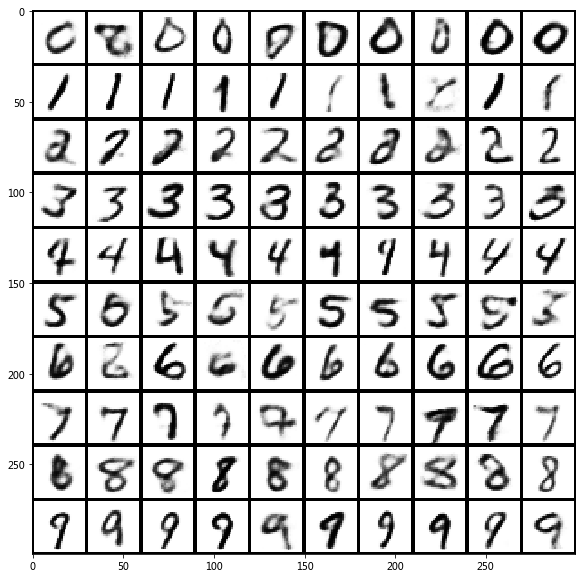

Epoch 21 (5.5s): Lower bound = -93.14009094238281
Epoch 22 (5.5s): Lower bound = -92.92753601074219
Epoch 23 (5.5s): Lower bound = -92.6998291015625
Epoch 24 (5.6s): Lower bound = -92.60163879394531
Epoch 25 (5.6s): Lower bound = -92.38922119140625
Epoch 26 (5.5s): Lower bound = -92.3130111694336
Epoch 27 (5.5s): Lower bound = -92.09749603271484
Epoch 28 (5.5s): Lower bound = -91.96048736572266
Epoch 29 (5.5s): Lower bound = -91.86946105957031
Epoch 30 (5.6s): Lower bound = -91.63414764404297
>>> TEST (0.3s)
>> Test lower bound = -92.61624908447266
Epoch 31 (5.5s): Lower bound = -91.54511260986328
Epoch 32 (5.5s): Lower bound = -91.488037109375
Epoch 33 (5.5s): Lower bound = -91.32456970214844
Epoch 34 (5.5s): Lower bound = -91.23704528808594
Epoch 35 (5.5s): Lower bound = -91.17420959472656
Epoch 36 (5.5s): Lower bound = -90.96466064453125
Epoch 37 (5.5s): Lower bound = -90.97726440429688
Epoch 38 (5.5s): Lower bound = -90.8652572631836
Epoch 39 (5.6s): Lower bound = -90.76953125
Epoc

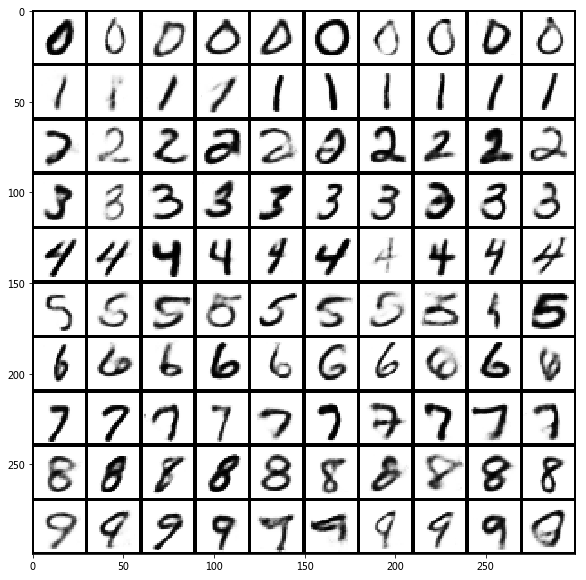

Epoch 41 (5.5s): Lower bound = -90.55524444580078
Epoch 42 (5.4s): Lower bound = -90.50898742675781
Epoch 43 (5.5s): Lower bound = -90.4945068359375
Epoch 44 (5.4s): Lower bound = -90.369384765625
Epoch 45 (5.4s): Lower bound = -90.32917022705078
Epoch 46 (5.5s): Lower bound = -90.22158813476562
Epoch 47 (5.5s): Lower bound = -90.14105987548828
Epoch 48 (5.5s): Lower bound = -90.02217102050781
Epoch 49 (5.5s): Lower bound = -90.01615142822266
Epoch 50 (5.5s): Lower bound = -89.96245574951172
>>> TEST (0.3s)
>> Test lower bound = -91.56362915039062
Epoch 51 (5.6s): Lower bound = -89.90798950195312
Epoch 52 (5.5s): Lower bound = -89.85948944091797
Epoch 53 (5.5s): Lower bound = -89.82418823242188
Epoch 54 (5.5s): Lower bound = -89.75971221923828
Epoch 55 (5.5s): Lower bound = -89.70030212402344
Epoch 56 (5.5s): Lower bound = -89.6348876953125
Epoch 57 (5.6s): Lower bound = -89.5003890991211
Epoch 58 (5.5s): Lower bound = -89.59053039550781
Epoch 59 (5.6s): Lower bound = -89.5039825439453

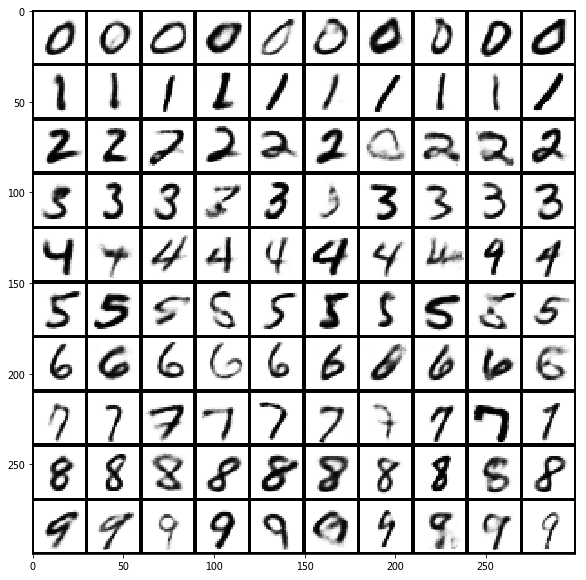

Epoch 61 (5.5s): Lower bound = -89.42584991455078
Epoch 62 (5.6s): Lower bound = -89.37318420410156
Epoch 63 (5.5s): Lower bound = -89.3074951171875
Epoch 64 (5.5s): Lower bound = -89.26485443115234
Epoch 65 (5.6s): Lower bound = -89.18965148925781
Epoch 66 (5.5s): Lower bound = -89.22306823730469
Epoch 67 (5.5s): Lower bound = -89.1707992553711
Epoch 68 (5.5s): Lower bound = -89.07482147216797
Epoch 69 (5.5s): Lower bound = -89.11148071289062
Epoch 70 (5.5s): Lower bound = -89.032470703125
>>> TEST (0.3s)
>> Test lower bound = -90.82662200927734
Epoch 71 (5.5s): Lower bound = -88.98098754882812
Epoch 72 (5.6s): Lower bound = -88.96685028076172
Epoch 73 (5.6s): Lower bound = -88.88475036621094
Epoch 74 (5.7s): Lower bound = -88.93318939208984
Epoch 75 (5.5s): Lower bound = -88.85426330566406
Epoch 76 (5.7s): Lower bound = -88.74107360839844
Epoch 77 (5.8s): Lower bound = -88.84632110595703
Epoch 78 (5.6s): Lower bound = -88.68473052978516
Epoch 79 (5.6s): Lower bound = -88.739883422851

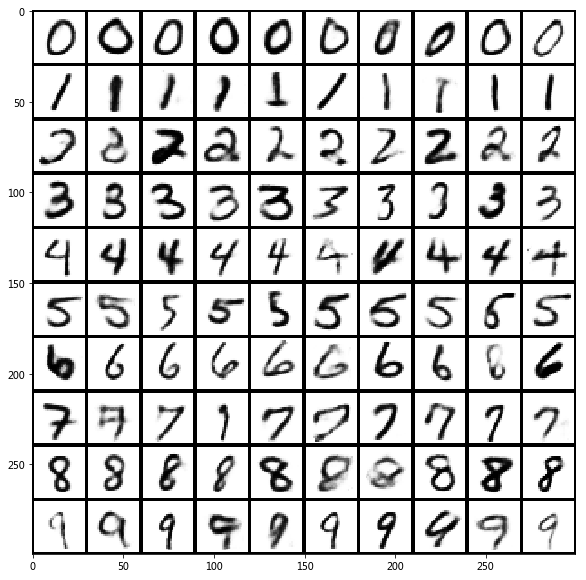

Epoch 81 (5.6s): Lower bound = -88.67329406738281
Epoch 82 (5.6s): Lower bound = -88.68767547607422
Epoch 83 (5.6s): Lower bound = -88.58932495117188
Epoch 84 (5.6s): Lower bound = -88.56282043457031
Epoch 85 (5.7s): Lower bound = -88.576171875
Epoch 86 (5.6s): Lower bound = -88.52340698242188
Epoch 87 (5.7s): Lower bound = -88.49463653564453
Epoch 88 (5.6s): Lower bound = -88.46317291259766
Epoch 89 (5.6s): Lower bound = -88.46951293945312
Epoch 90 (5.6s): Lower bound = -88.40595245361328
>>> TEST (0.4s)
>> Test lower bound = -90.61261749267578
Epoch 91 (5.6s): Lower bound = -88.4302978515625
Epoch 92 (5.6s): Lower bound = -88.36347961425781
Epoch 93 (5.6s): Lower bound = -88.38795471191406
Epoch 94 (5.6s): Lower bound = -88.316650390625
Epoch 95 (5.5s): Lower bound = -88.20874786376953
Epoch 96 (5.6s): Lower bound = -88.30078125
Epoch 97 (5.6s): Lower bound = -88.30470275878906
Epoch 98 (5.6s): Lower bound = -88.1954116821289
Epoch 99 (5.6s): Lower bound = -88.20394134521484
Epoch 10

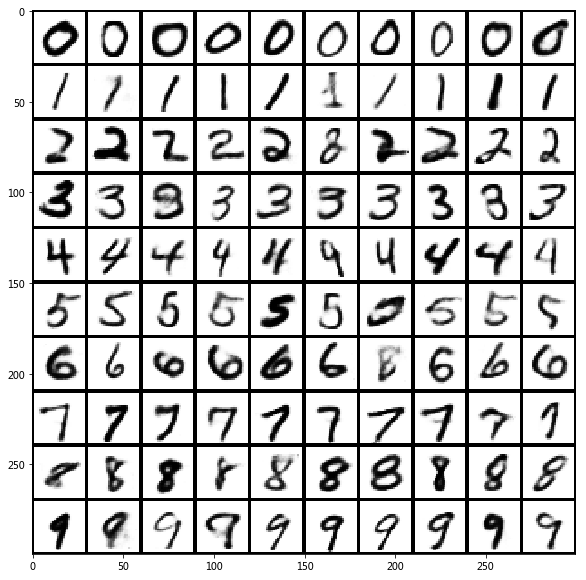

In [2]:
train_data_path = '../data/train-images-idx3-ubyte'
train_label_path = '../data/train-labels-idx1-ubyte'
test_data_path = '../data/t10k-images-idx3-ubyte'
test_label_path = '../data/t10k-labels-idx1-ubyte'
train_x = load_image_set(train_data_path)
train_y = load_label_set(train_label_path)
test_x = load_image_set(test_data_path)
test_y = load_label_set(test_label_path)

imgNum, width, height = train_x.shape
x_dim = width * height
y_dim, z_dim = 10, 40
x_train = train_x.reshape([imgNum, x_dim]) / 255.
x_test = test_x.reshape([test_x.shape[0], x_dim]) / 255.
y_train = to_categorical(train_y, num_classes=y_dim)
y_test = to_categorical(test_y, num_classes=y_dim)

n_particles = tf.placeholder(tf.int32, shape=[], name='n_particles')
x_input = tf.placeholder(tf.float32, shape=[None, x_dim], name='x')
x = tf.to_int32(tf.less(tf.random_uniform(tf.shape(x_input)), x_input))
batch_size = 128
y_input = tf.placeholder(tf.int32, shape=[None, y_dim], name='y')

def log_joint(observed):
    model = cvae(observed, x_dim, y_dim, z_dim, batch_size, n_particles)
    log_pz, log_px_yz = model.local_log_prob(['z', 'x'])
    return log_pz + log_px_yz

variational = q_net({'x': x, 'y': y_input}, x_dim, y_dim, z_dim, n_particles)
qz_samples, log_qz = variational.query('z', outputs=True, local_log_prob=True)
lower_bound = zs.variational.elbo(log_joint,
                                  observed={'x': x, 'y': y_input},
                                  latent={'z': [qz_samples, log_qz]},
                                  axis=0)
cost = tf.reduce_mean(lower_bound.sgvb())
lower_bound = tf.reduce_mean(lower_bound)

optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
infer_op = optimizer.minimize(cost)

n_gen = 100
x_mean = cvae({'y': y_input}, x_dim, y_dim, z_dim, n_gen, n_particles).outputs('x_mean')
x_gen = tf.reshape(x_mean, [-1, 28, 28, 1])

epochs = 100
# batch_size = 128
iters = x_train.shape[0] // batch_size
save_freq, test_freq = 20, 10
test_batch_size = 128
test_iters = x_test.shape[0] // test_batch_size

result_path = '../results/'
y_vis = np.eye(10)
y_vis = np.repeat(y_vis, 10, axis=0)
train_hist_lb, test_hist_lb = [], []
train_hist_tm, test_hist_tm = [], []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1, epochs + 1):
        time_epoch = -time.time()
        shuffle_ind = np.arange(x_train.shape[0])
        np.random.shuffle(shuffle_ind)
        x_train, y_train = x_train[shuffle_ind], y_train[shuffle_ind]
        lbs = []
        for t in range(iters):
            x_batch = x_train[t * batch_size:(t + 1) * batch_size]
            y_batch = y_train[t * batch_size:(t + 1) * batch_size]
            _, lb = sess.run([infer_op, lower_bound],
                             feed_dict={x_input: x_batch,
                                        y_input: y_batch,
                                        n_particles: 1})
            lbs.append(lb)
        time_epoch += time.time()
        print('Epoch {} ({:.1f}s): Lower bound = {}'.format(epoch, time_epoch, np.mean(lbs)))
        train_hist_lb.append(np.mean(lbs))
        train_hist_tm.append(time_epoch)

        if epoch % test_freq == 0:
            time_test = -time.time()
            test_lbs = []
            for t in range(test_iters):
                test_x_batch = x_test[t * test_batch_size:(t + 1) * test_batch_size]
                test_y_batch = y_test[t * test_batch_size:(t + 1) * test_batch_size]
                test_lb = sess.run(lower_bound,
                                   feed_dict={x_input: test_x_batch,
                                              y_input: test_y_batch,
                                              n_particles: 1})
                test_lbs.append(test_lb)
            time_test += time.time()
            print('>>> TEST ({:.1f}s)'.format(time_test))
            print('>> Test lower bound = {}'.format(np.mean(test_lbs)))
            test_hist_lb.append(np.mean(test_lbs))
            test_hist_tm.append(time_test)

        if epoch % save_freq == 0:
            images = sess.run(x_gen, 
                              feed_dict={y_input: y_vis, 
                                         n_particles: 1})
            res = np.ones((300, 300))
            for i in range(10):
                for j in range(10):
                    res[(30 * i + 1):(30 * i + 29), (30 * j + 1):(30 * j + 29)] = np.array(images[i * 10 + j]).reshape(28, 28)
            plt.figure(figsize=(10, 10))
            plt.imshow(res, cmap='binary')
            plt.show()


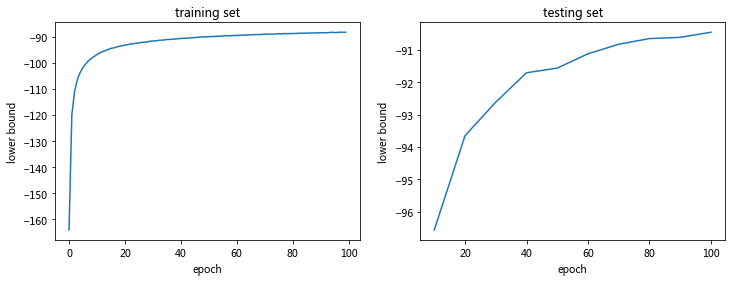

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
train_epoch_ind = list(range(1, 101))
plt.plot(train_hist_lb)
plt.xlabel('epoch')
plt.ylabel('lower bound')
plt.title('training set')
plt.subplot(1, 2, 2)
test_epoch_ind = list(range(10, 101, 10))
plt.plot(test_epoch_ind, test_hist_lb)
plt.xlabel('epoch')
plt.ylabel('lower bound')
plt.title('testing set')
plt.show()